In [1]:
# Package Imports - feel free to add what you think might be useful! 
# %pip install numpy
# %pip install matplotlib

import numpy as np 
import matplotlib.pyplot as plt 
import math

## Task 1: Playing with Pseudo-Randomness

### Part A: Implement and Benchmark an LCG

In [2]:
def Linear_Congruential_Generator(seed, multipler, increment, modulus, num_samples):
    sequence = []
    # pass # TODO: implement the LCG here!
    X0 = seed
    a = multipler
    c = increment
    m = modulus
    for i in range(num_samples):
        X_next = (a*X0 + c) % m
        sequence.append(X_next)
        X0 = X_next
    # sequence.append(X_n)
    return sequence 

In [3]:
# pass # TODO: ensure at least one parameter set satisfies the Hull-Dobell Theorem and demonstrates a full-period LCG
def generate_LCG_parameters(num_bits_m=16):
    # Example parameters that satisfy the Hull-Dobell theorem
    
    # Take m as a power of 2
    m = 2**num_bits_m
    
    #Choose increment c so that gcd(c, m) = 1
    while True:
        c = np.random.randint(1, m)
        if np.gcd(c, m) == 1:
            break
        
    #Choose multiplier a so that (a-1) is divisible by all prime factors of m
    prime_factors = [2] # Considering only 2 as a prime factor for m = 2^16
    while True:
        a = np.random.randint(3, m)
        if all((a - 1) % p == 0 for p in prime_factors):
            if m % 4 == 0 and (a-1) % 4 == 0:
                break
    
    return a, c, m

In [4]:
# pass # TODO: run your generator for at least 10e6 steps
a, c, m = generate_LCG_parameters(16)
seed = np.random.randint(1, m)
sequence = Linear_Congruential_Generator(seed, a, c, m, 1000000)

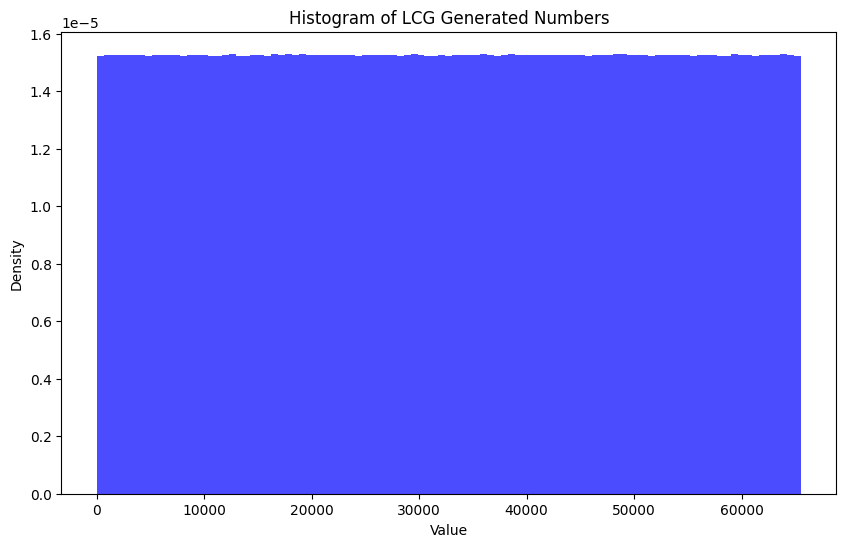

In [5]:
# pass # TODO: plot a histogram of the generated numbers to visualize distribution
# generate a histogram of the generated numbers

plt.figure(figsize=(10, 6))
plt.hist(sequence, bins='auto', density=True, alpha=0.7, color='blue')
plt.title('Histogram of LCG Generated Numbers')
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()


In [8]:
def compute_entropy(X):
    """ 
    You can pass in the random variable X in whatever form you choose.
    One way to represent a random variable is as a dictionary, 
    where each (key, value) pair represents an outcome x 
    and its probability P(X = x)

    Hint: NumPy might be helpful here!
    """
    #construct the probability distribution
    # probabilities = np.array([np.sum(X == x) for x in np.unique(X)])
    _,probabilities = np.unique(X, return_counts=True)
    probabilities =np.array(probabilities)/ len(X)
    
    #compute the shannon-entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy
    # pass # TODO: copmute Shannon Entropy or Min Entropy
compute_entropy(sequence)

np.float64(15.999411805739985)

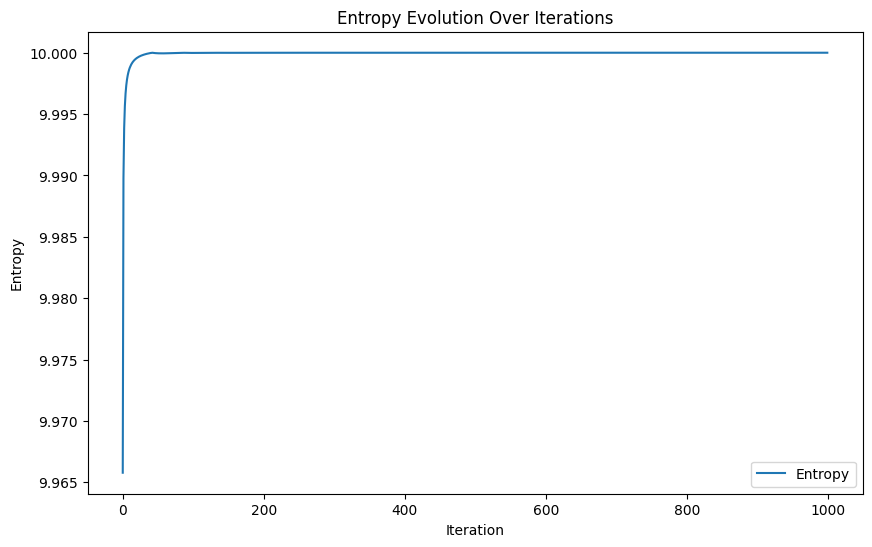

In [9]:
""" 
1. fix a short seed value for each LCG 
(no more than 2^10 possible values for the seed)

2. Over a long LCG sequence (at least 10^6 samples),
as the generator produces values, treat the sequence of outputs 
up to each step as a growing empirical distribution.

3. At regular intervals (e.g., every 1000 iterations), 
compute the Shannon Entropy or Min-Entropy 
of the current sample distribution.

Hint: We've already imported matplotlib for you, 
though any plotting package will do the trick.
"""
# pass # TODO: Plot how the Shannon Entropy or Min-Entropy evolves with the number of iterations for each LCG configuration.
a_1, c_1, m_1 = generate_LCG_parameters(num_bits_m=10)
seed_1 = np.random.randint(1, m_1)
sequence_1 = []
entropies = []
for i in range(1000):
    
    seq = Linear_Congruential_Generator(seed_1, a_1, c_1, m_1, 1000)
    seed_1 = seq[-1]  # Update the seed to the last generated number
    sequence_1.extend(seq)
    
    entropy = compute_entropy(sequence_1)
    entropies.append(entropy)
    # print(f"Entropy at iteration {i}: {entropy}")

plt.figure(figsize=(10, 6))
plt.plot(range(1000), entropies, label='Entropy')
plt.title('Entropy Evolution Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.legend()
plt.show()



### Part B: Implement and Benchmark AES-Based PRNGs

In [ ]:
# Here is a reference implementation of the AES algorithm: https://github.com/burakozpoyraz/Advanced-Encryption-Standard/tree/master

In [144]:
# TODO: helper function to pad/truncate the seed to 16 bytes (128 bits)
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

def pad_seed(seed_bytes, target_len=16):
    # pass  # TODO: pad or truncate the seed appropriately
    if len(seed_bytes) < target_len:
        # Pad with zeros
        seed_bytes += b'\x00' * (target_len - len(seed_bytes))
    elif len(seed_bytes) > target_len:
        # Truncate to target length
        seed_bytes = seed_bytes[:target_len]
    return seed_bytes

# TODO: implement a simple AES-based PRNG using ECB mode

def AES_PRNG(seed, num_bytes):
    # pass  # TODO: implement AES-based pseudorandom generator
    
    sequence = []
    
    key = pad_seed(seed)
    if len(key) != 16:
      raise ValueError("Seed must be 16 bytes for AES-128")
    
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
    prng_encryptor = cipher.encryptor()
    
    prng_counter = 0
    
    
    # bytes = get_random_bytes(num_bytes).hex()
    
    result = b""
    while len(result) < num_bytes*16:
        counter_bytes = prng_counter.to_bytes(16, byteorder='big')
        prng_counter += 1
        result += prng_encryptor.update(counter_bytes)
    
    bytes = result[:num_bytes*16].hex()
    
    #last byte from every 128 bits
    for i in range(0, len(bytes), 32):
        
        sequence.append(int(bytes[i:i+2], 16))

    
    return sequence



In [159]:
# TODO: choose at least 3 different seed lengths (e.g., 8, 16, 64 bits)
seed_lengths = [1, 2, 8]  # in bytes

# TODO: generate sequences of increasing length (10^5 to 10^7) for each seed length
# sequence_lengths = [10**5, 10**6]
sequence_lengths = [10**5]

In [160]:
# Example: Generate and store sequences
all_sequences = {}

for seed_len in seed_lengths:
    seed = np.random.bytes(seed_len)
    # print(seed)
    all_sequences[seed_len] = {}

    for seq_len in sequence_lengths:
        prng_output = AES_PRNG(seed, seq_len)
        all_sequences[seed_len][seq_len] = prng_output

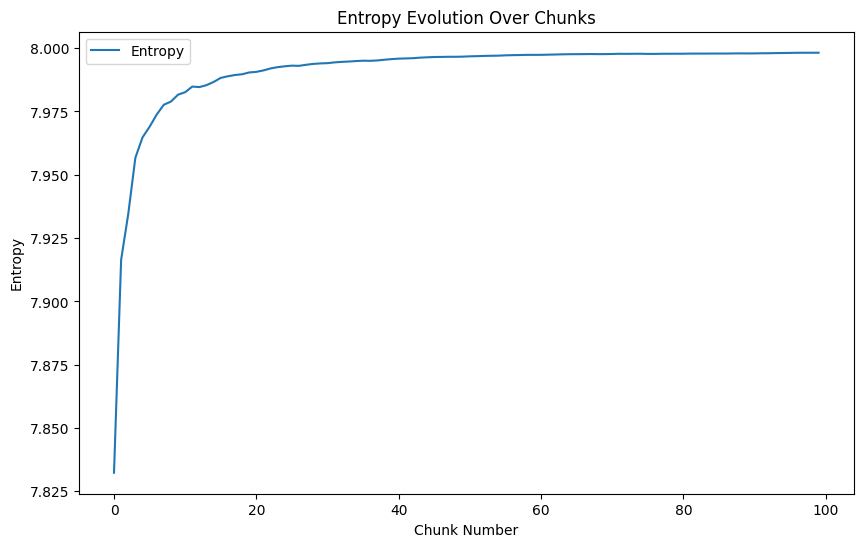

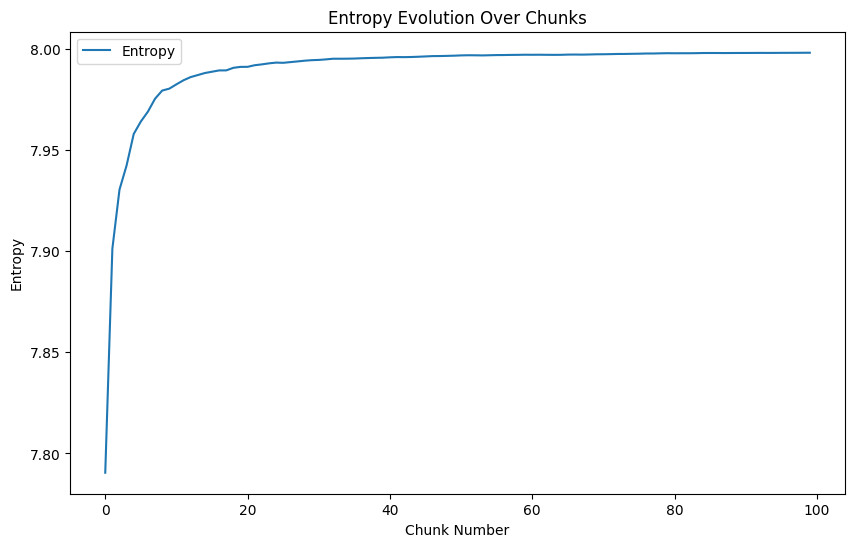

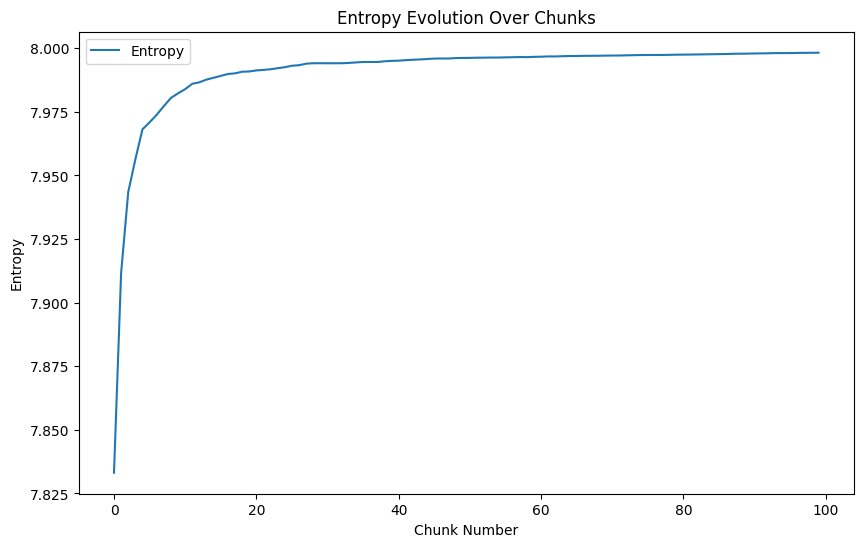

In [161]:
# TODO: plot entropy across chunks of the output to study randomness
def plot_entropy(sequence, window_size=1000):
    # TODO: split sequence into chunks and calculate Shannon entropy
    entropies = []
    sequences = []
    for i in range(0, len(sequence), window_size):
        chunk = sequence[i:i + window_size]
        sequences.extend(chunk)
        entropy = compute_entropy(sequences)
        entropies.append(entropy)
    # print(np.argmax(entropies), max(entropies))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(int(len(sequence)/window_size)), entropies, label='Entropy')
    plt.title('Entropy Evolution Over Chunks')
    plt.xlabel('Chunk Number')
    plt.ylabel('Entropy')
    plt.legend()
    plt.show()
    
plot_entropy(all_sequences[1][10**5], window_size=1000)
plot_entropy(all_sequences[2][10**5], window_size=1000)
plot_entropy(all_sequences[8][10**5], window_size=1000)


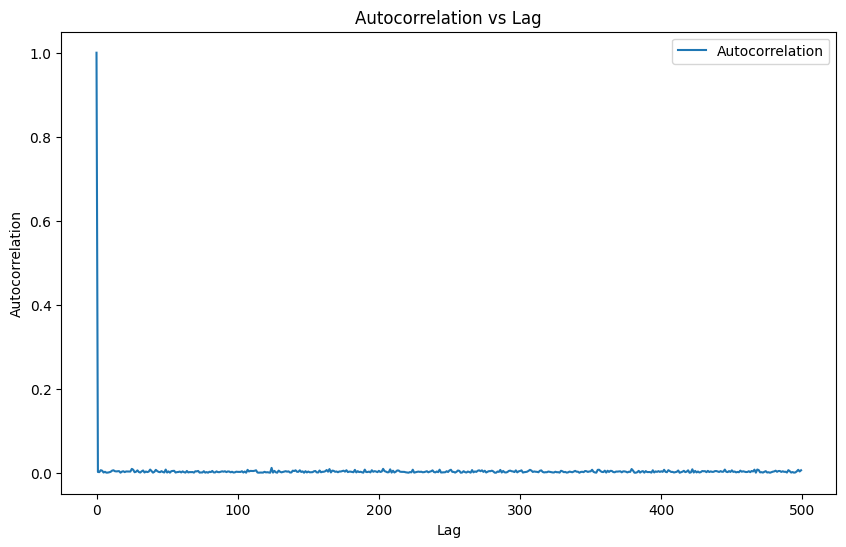

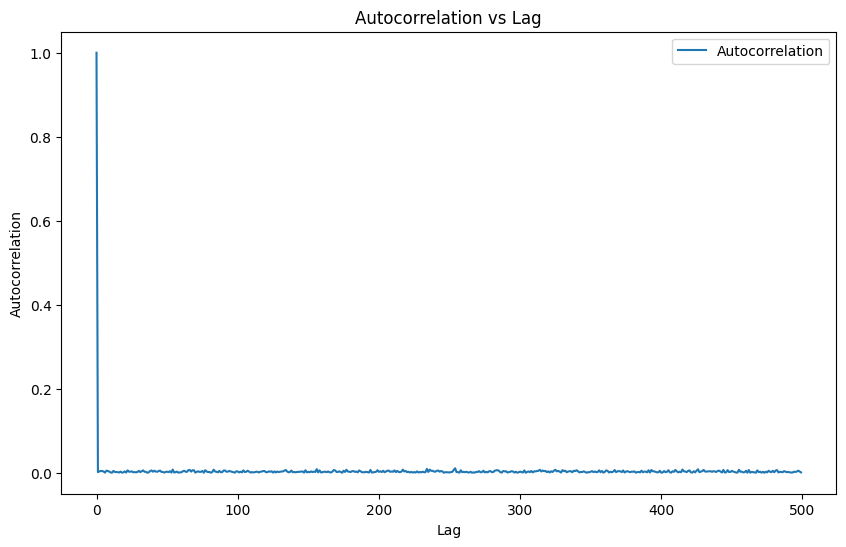

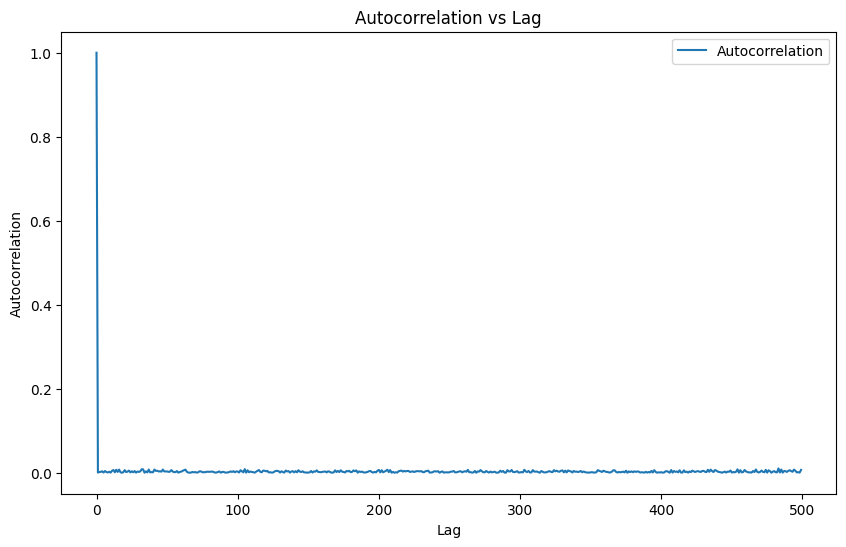

In [162]:
# TODO: plot autocorrelation vs lag
def plot_autocorrelation(sequence, max_lag=100):
    # Compute autocorrelation for various lag values (start from lag=1)
    corr = []
    for lag in range(0, max_lag):
        # Compute autocorrelation for the current lag
        n = len(sequence)
        mean = np.mean(sequence)
        den = np.sum((sequence[:n - lag] - mean) * (sequence[lag:] - mean))
        num = np.sum((sequence[:n] - mean) ** 2)
        autocorr = den / num if num != 0 else 0

        
        corr.append(autocorr)
        
    plt.figure(figsize=(10, 6))
    plt.plot(range(0, max_lag), np.abs(corr), label='Autocorrelation')
    plt.title('Autocorrelation vs Lag')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.legend()
    plt.show()
plot_autocorrelation(all_sequences[1][10**5], max_lag=500)
plot_autocorrelation(all_sequences[2][10**5], max_lag=500)
plot_autocorrelation(all_sequences[8][10**5], max_lag=500)

In [163]:
# TODO: apply statistical tests (e.g., Chi-squared) to compare with uniform distribution
from scipy.stats import chi2
def run_statistical_tests(sequence):            
    # TODO: run and print p-values for randomness tests
    # Chi-squared test
    observed_freq, _ = np.histogram(sequence, bins=256, range=(0, 256))
    # print(f"Observed frequencies: {observed_freq}")
    expected_freq = np.full_like(observed_freq, len(sequence) / 256)
    chi_squared_stat = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
    
    print(f"Chi-squared statistic: {chi_squared_stat}")
    p_value = 1 - chi2.cdf(chi_squared_stat, df=255)
    print(f"Chi-squared p-value: {p_value}")
    
run_statistical_tests(all_sequences[1][10**5])
run_statistical_tests(all_sequences[2][10**5])
run_statistical_tests(all_sequences[8][10**5])


Chi-squared statistic: 250.30769230769232
Chi-squared p-value: 0.5712257362756195
Chi-squared statistic: 258.94358974358977
Chi-squared p-value: 0.4194810923798101
Chi-squared statistic: 244.32820512820513
Chi-squared p-value: 0.6735303698126609


### (BONUS) Part C: Breaking the Illusion of Randomness

### Bonus Task:
Train a light-weight model (small-neural net or decision tree) to predict the next number in your random number sequences generated from LCG and AES. Now try implementing at least one other more robust PRNGs from the list below:
- XOR-Shift Generator
- Permuted Congruential Generator (PCG) 
- SplitMix64 

In [119]:
# You may want to import these packages, though feel free to import anything else you need
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [164]:
a_lcg, c_lcg, m_lcg = generate_LCG_parameters(num_bits_m=8)
seed_lcg = np.random.randint(1, m_lcg)
seq_lcg = Linear_Congruential_Generator(seed_lcg, a_lcg, c_lcg, m_lcg, 10000)
print(f"LCG Sequence: {seq_lcg[:10]}")  # Print first 10 values of the LCG sequence


seed_aes = np.random.bytes(16)
seq_aes = AES_PRNG(seed_aes, 10000)
print(f"AES Sequence: {seq_aes[:10]}")  # Print first 10 values of the AES sequence



def prepare_data(sequence, k):
    X, y = [], []
    for i in range(len(sequence) - k):
        X.append(sequence[i:i + k])
        y.append(sequence[i + k])
    return np.array(X), np.array(y)



LCG Sequence: [250, 207, 192, 157, 246, 27, 28, 201, 178, 39]
AES Sequence: [172, 177, 158, 195, 63, 149, 232, 185, 202, 206]


In [170]:
sequence = seq_lcg 

window_size = 10
X, y = prepare_data(sequence, window_size)
X = X / 255.0
y = y / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lcg = Sequential([
    Dense(32, activation='relu', input_shape=(window_size,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model_lcg.compile(optimizer='adam', loss='mse')

model_lcg.fit(X_train, y_train, epochs=50, verbose=1)

loss = model_lcg.evaluate(X_test, y_test)
print(f"Test loss: {loss:.6f}")

preds = model_lcg.predict(X_test[:10])
for i in range(10):
    inp = (X_test[i] * 255).astype(int)
    true = int(y_test[i] * 255)
    pred = int(np.clip(preds[i][0] * 255, 0, 255))
    print(f"Input: {inp}, True: {true}, Predicted: {pred}")

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1018
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0678
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0514
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0384
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0274
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0185
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0086
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025
Epoch 13/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
Epoch 14/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015
Epoch 15/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [171]:
sequence = seq_aes 

window_size = 10
X, y = prepare_data(sequence, window_size)
X = X / 255.0
y = y / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_aes = Sequential([
    Dense(32, activation='relu', input_shape=(window_size,)),
    Dense(32, activation='relu'),
    Dense(1)
])
model_aes.compile(optimizer='adam', loss='mse')

model_aes.fit(X_train, y_train, epochs=50, verbose=1)

loss = model_aes.evaluate(X_test, y_test)
print(f"Test loss: {loss:.6f}")

preds = model_aes.predict(X_test[:10])
for i in range(10):
    inp = (X_test[i] * 255).astype(int)
    true = int(y_test[i] * 255)
    pred = int(np.clip(preds[i][0] * 255, 0, 255))
    print(f"Input: {inp}, True: {true}, Predicted: {pred}")

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0951
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0857
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0845
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0840
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0831
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0835
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0846
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0846
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0837
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0828
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0829
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0820
Epoch 13/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0817
Epoch 14/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0831
Epoch 15/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo